In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing the Training Datasets

In [2]:
# Importing the training datasets
df=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
# Getting all the image data
imgs=df.iloc[:,-1]

In [4]:
imgs

0        Train/20/00020_00000_00000.png
1        Train/20/00020_00000_00001.png
2        Train/20/00020_00000_00002.png
3        Train/20/00020_00000_00003.png
4        Train/20/00020_00000_00004.png
                      ...              
39204    Train/42/00042_00007_00025.png
39205    Train/42/00042_00007_00026.png
39206    Train/42/00042_00007_00027.png
39207    Train/42/00042_00007_00028.png
39208    Train/42/00042_00007_00029.png
Name: Path, Length: 39209, dtype: object

In [5]:
# making the classes labels
# there are total 43 classes so we are make it a dictionary

class_labels={ 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
import os

In [7]:
# In the Meta file
dir={}

files=os.listdir('/kaggle/input/gtsrb-german-traffic-sign/Meta')
exclude_file=['.~lock.ClassesInformation.ods#','.~lock.ClassesInformationStrong.ods#']
files=[file for file in files if file not in exclude_file]


In [8]:
for file in files:
    class_id=int(file.split('.')[0])
    path=os.path.join('/kaggle/input/gtsrb-german-traffic-sign/Meta',file)
    
    # Convert the Images in numpy arrays
    im=Image.open(path).convert('RGB')
    im_arr=np.array(im)
    
    dir[class_id]=im_arr

In [9]:
train_data_folder = "/kaggle/input/gtsrb-german-traffic-sign/Train"
# Giving new size
new_size=(50,50)

x_data=[]
y_data=[]

for class_id in os.listdir(train_data_folder):
    class_dir = os.path.join(train_data_folder, class_id)
    
    if os.path.isdir(class_dir):
        for img_filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_filename)
            
            with Image.open(img_path) as img:
                img = img.convert("RGB")
                img = img.resize(new_size)
                img_array = np.array(img)
                
                # Append the image data and its corresponding class ID to the lists
                x_data.append(img_array)
                y_data.append(int(class_id))


In [10]:
x_data=np.array(x_data)
y_data=np.array(y_data)

In [11]:
print('shape of x_data : ',x_data.shape)
print('shape of y_data : ',y_data.shape)

shape of x_data :  (39209, 50, 50, 3)
shape of y_data :  (39209,)


/tmp/ipykernel_28/592659310.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


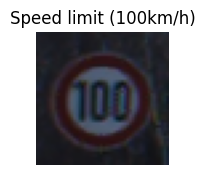

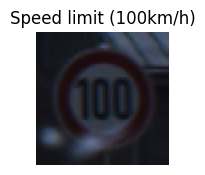

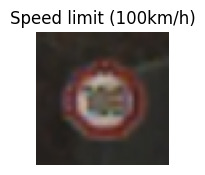

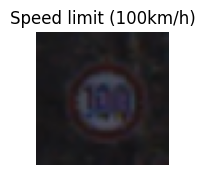

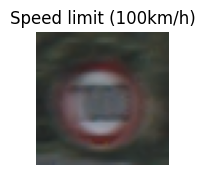

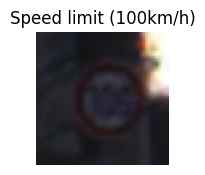

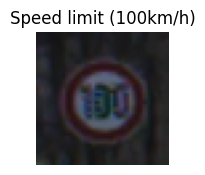

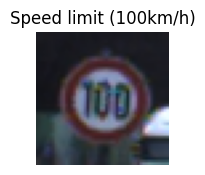

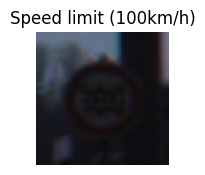

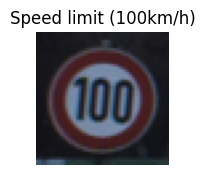

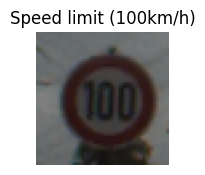

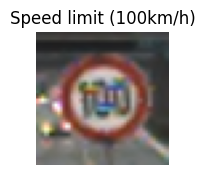

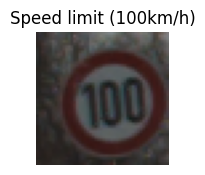

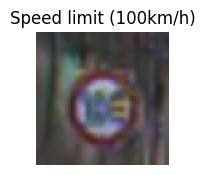

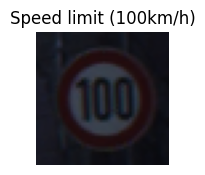

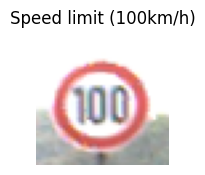

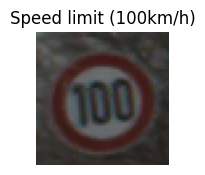

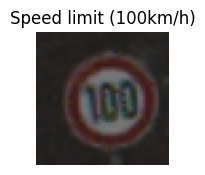

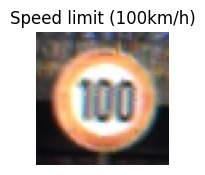

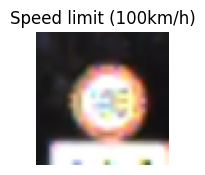

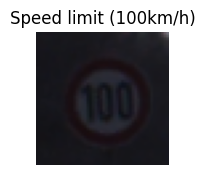

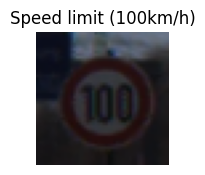

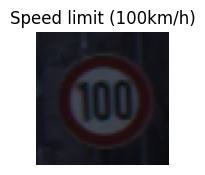

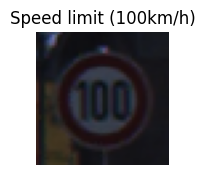

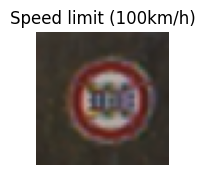

In [12]:
for i in range(25):
    plt.figure(figsize=(10,10))
    plt.subplot(5,5,i+1)
    plt.imshow(x_data[i])
    plt.axis('off')
    plt.title(class_labels[y_data[i]])

### Adjusting data for training and validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_val,y_train,y_val=train_test_split(x_data,y_data,test_size=0.25,shuffle=True)

In [15]:
X_train = x_train/255
X_val = x_val/255

### Creating the CNNModel

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [17]:
import keras

In [18]:
cnn_model=Sequential([
    keras.layers.Conv2D(filters=32,padding='valid',activation='relu',strides=(1,1),input_shape=(50,50,3),kernel_size=3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=32,padding='same',activation='relu',strides=(2,2),kernel_size=3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=128,activation='relu'),
    
    keras.layers.Dense(units=256,activation='relu'),
    
    keras.layers.Dense(units=128,activation='relu'),
    
    keras.layers.Dense(units=43,activation='softmax')
])

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [20]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn_model.fit(X_train,y_train,epochs=10,batch_size=256,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
115/115 [==============================] - 18s 24ms/step - loss: 2.7637 - accuracy: 0.2350 - val_loss: 1.7970 - val_accuracy: 0.4196
Epoch 2/10
115/115 [==============================] - 2s 14ms/step - loss: 1.3689 - accuracy: 0.5611 - val_loss: 0.9634 - val_accuracy: 0.6960
Epoch 3/10
115/115 [==============================] - 2s 15ms/step - loss: 0.7112 - accuracy: 0.7794 - val_loss: 0.5575 - val_accuracy: 0.8244
Epoch 4/10
115/115 [==============================] - 2s 15ms/step - loss: 0.4103 - accuracy: 0.8752 - val_loss: 0.3454 - val_accuracy: 0.8986
Epoch 5/10
115/115 [==============================] - 2s 15ms/step - loss: 0.2791 - accuracy: 0.9175 - val_loss: 0.2562 - val_accuracy: 0.9261
Epoch 6/10
115/115 [==============================] - 2s 15ms/step - loss: 0.1944 - accuracy: 0.9430 - val_loss: 0.2144 - val_accuracy: 0.9354
Epoch 7/10
115/115 [==============================] - 2s 15ms/step - loss: 0.1525 - accuracy: 0.9560 - val_loss: 0.1886 - val_accuracy: 0.939

#### From the accuracy rate it may be bit overfitting.
##### So lets add some dropout layers

In [22]:
cnn_model2=Sequential([
    keras.layers.Conv2D(filters=32,padding='valid',activation='relu',strides=(1,1),input_shape=(50,50,3),kernel_size=3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=32,padding='same',activation='relu',strides=(2,2),kernel_size=3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(units=128,activation='relu'),
    
    keras.layers.Dense(units=43,activation='softmax')
])

In [23]:
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model2.fit(X_train,y_train,epochs=30,batch_size=256,verbose=1,validation_data=(X_val,y_val))

Epoch 1/30
115/115 [==============================] - 5s 23ms/step - loss: 2.9577 - accuracy: 0.1848 - val_loss: 1.8589 - val_accuracy: 0.3862
Epoch 2/30
115/115 [==============================] - 2s 15ms/step - loss: 1.5781 - accuracy: 0.4830 - val_loss: 1.0564 - val_accuracy: 0.6512
Epoch 3/30
115/115 [==============================] - 2s 14ms/step - loss: 0.9812 - accuracy: 0.6751 - val_loss: 0.5773 - val_accuracy: 0.8311
Epoch 4/30
115/115 [==============================] - 2s 14ms/step - loss: 0.6334 - accuracy: 0.7918 - val_loss: 0.3757 - val_accuracy: 0.8859
Epoch 5/30
115/115 [==============================] - 2s 14ms/step - loss: 0.4410 - accuracy: 0.8558 - val_loss: 0.2469 - val_accuracy: 0.9267
Epoch 6/30
115/115 [==============================] - 2s 14ms/step - loss: 0.3401 - accuracy: 0.8903 - val_loss: 0.2003 - val_accuracy: 0.9407
Epoch 7/30
115/115 [==============================] - 2s 14ms/step - loss: 0.2730 - accuracy: 0.9132 - val_loss: 0.1535 - val_accuracy: 0.9542

In [24]:
df_test=pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
x1_test=[]
y1_test=[]
for i in range(df_test.shape[0]):
    img_test=Image.open("/kaggle/input/gtsrb-german-traffic-sign"+"/"+df_test.iloc[i,-1])
    img_test=img_test.resize(new_size)
    img_test=img_test.convert("RGB")
    x1_test.append(np.array(img_test))  
    y1_test.append(df_test.iloc[i,6])

In [25]:
x_test=np.array(x1_test)
x_test.shape

(12630, 50, 50, 3)

In [26]:
y_test=np.array(y1_test)
y_test.shape


(12630,)

In [27]:
cnn_model2.evaluate(x_test,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 68.6046 - accuracy: 0.8994


[68.60459899902344, 0.8994457721710205]